![example](images/director_shot.jpeg)

# Movie Analysis

**Authors:** Justin Hue
***

## Overview

This notebook will dive into which successful films a business interested in creating original movies should look into emulating. This notebook will give insight into what genres of films are most successful, what kinds of films are the highest rated, as well as which of the top films of the last decade are the highest grossing. With this information, a business would have actionable, tangible insights that they will be able to put to use in a multitude of ways.

## Business Problem

Summary of the business problem you are trying to solve, and the data questions that you plan to answer to solve them.

***
Questions to consider:
* What are the business's pain points related to this project?
* How did you pick the data analysis question(s) that you did?
* Why are these questions important from a business perspective?
***

## Data Understanding

Describe the data being used for this project.
***
* We have 2 tables from IMDB, which include basic information about each title as well as the ratings each film received, as well as the amount of votes casted to rate each film.
* This data represents the most successful movies over a recent time period (about the last 10 years).
* The target variable here is the average rating of the movies cross-referenced with the number of votes the films received. We want to make sure the movie was well received by a large audience.
***

In [1]:
# Import standard packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
! ls

DS_Project_Presentation.pdf
Movie-Analysis.ipynb
README.md
TEMPLATE_README.md
data
images


In [238]:
df1 = pd.read_csv('data/zippedData/imdb.title.basics.csv.gz',  header=0, encoding='latin-1')
df2 = pd.read_csv('data/zippedData/imdb.title.ratings.csv.gz', header=0, encoding='latin-1')
df3 = pd.read_csv('data/zippedData/bom.movie_gross.csv.gz', header=0, encoding='latin-1')
df1.drop_duplicates()
df2.drop_duplicates()
df3.sort_values(['domestic_gross'],ascending = False).head(50)
df3.groupby('studio')
df3.groupby(df3['studio'])
studio_earnings = df3.groupby('studio').sum().sort_values(by = 'domestic_gross').tail(20).drop(columns='year')

In [239]:
df3.groupby('studio').sum().sort_values(by = 'domestic_gross').tail(20).drop(columns='year')

,domestic_gross
studio,
SPC,4.420310e+08
ORF,7.450000e+08
STX,7.521000e+08
Sum.,9.318710e+08
Rela.,9.432940e+08
TriS,9.709000e+08
FoxS,1.061832e+09
Focus,1.172041e+09
SGem,1.526400e+09


Based on the table above, we learned that the top 5 grossing studios in movies are: Disney, Universal, Warner Bros., Fox, and Sony.

## Data Preparation

Describe and justify the process for preparing the data for analysis.

***
Questions to consider:
* Were there variables you dropped or created?
* How did you address missing values or outliers?
* Why are these choices appropriate given the data and the business problem?
***

In [262]:
# Here you run your code to clean the data
df1.drop_duplicates()
df2.drop_duplicates()
joined_df = pd.merge(df1, df2, on='tconst', how='inner') #These two tables are merged by common id number.
joined_df.sort_values((['numvotes', 'averagerating']), ascending=[False, False]).head(50) #This code sorts by the number of votes casted
joined_df = joined_df[joined_df['numvotes'] > 500000].sort_values(('numvotes'), ascending = [False]) 
#in order to filter down the number of movies, i implemented code that only shows movies with over 500,000 votes. source: https://stackoverflow.com/questions/13851535/how-to-delete-rows-from-a-pandas-dataframe-based-on-a-conditional-expression

joined_df = joined_df[joined_df['averagerating'] > 7.5].sort_values(('averagerating'), ascending = [False])
joined_df = joined_df.head(20)
joined_df = joined_df.drop(columns = ['tconst', 'start_year', 'runtime_minutes', 'original_title'])
joined_df

,primary_title,genres,averagerating,numvotes
2387,Inception,"Action,Adventure,Sci-Fi",8.8,1841066
280,Interstellar,"Adventure,Drama,Sci-Fi",8.6,1299334
26774,Whiplash,"Drama,Music",8.5,616916
43419,Avengers: Infinity War,"Action,Adventure,Sci-Fi",8.5,670926
7125,The Intouchables,"Biography,Comedy,Drama",8.5,677343
12072,Django Unchained,"Drama,Western",8.4,1211405
2241,The Dark Knight Rises,"Action,Thriller",8.4,1387769
91,Toy Story 3,"Adventure,Animation,Comedy",8.3,682218
507,The Wolf of Wall Street,"Biography,Crime,Drama",8.2,1035358
17199,Inside Out,"Adventure,Animation,Comedy",8.2,536181


In [261]:
df3 = df3.sort_values(('domestic_gross'), ascending = [False]).head(20)
df3

,title,studio,domestic_gross,foreign_gross,year
1872,Star Wars: The Force Awakens,BV,936700000.0,"1,131.6",2015
3080,Black Panther,BV,700100000.0,646900000,2018
3079,Avengers: Infinity War,BV,678800000.0,"1,369.5",2018
1873,Jurassic World,Uni.,652300000.0,"1,019.4",2015
727,Marvel's The Avengers,BV,623400000.0,895500000,2012
2758,Star Wars: The Last Jedi,BV,620200000.0,712400000,2017
3082,Incredibles 2,BV,608600000.0,634200000,2018
2323,Rogue One: A Star Wars Story,BV,532200000.0,523900000,2016
2759,Beauty and the Beast (2017),BV,504000000.0,759500000,2017
2324,Finding Dory,BV,486300000.0,542300000,2016


## Data Modeling
Describe and justify the process for analyzing or modeling the data.

***
Questions to consider:
* How did you analyze or model the data?
* How did you iterate on your initial approach to make it better?
* Why are these choices appropriate given the data and the business problem?
***

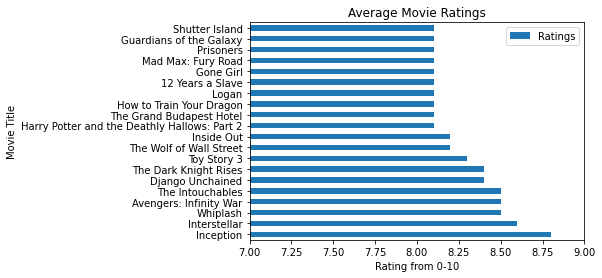

In [243]:
# Here you run your code to model the data
ax = joined_df.plot.barh('primary_title', 'averagerating');
ax.set_title('Average Movie Ratings');
ax.legend(['Ratings']);
ax.set_xlabel('Rating from 0-10')
ax.set_ylabel('Movie Title');
ax.set_xlim(7,9);

(300000000.0, 1000000000.0)

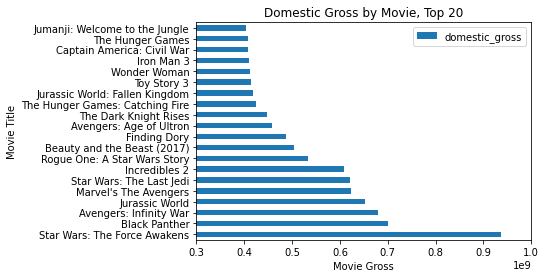

In [258]:
ax2 = df3.plot.barh('title', 'domestic_gross');
ax2.set_title('Domestic Gross by Movie, Top 20');
ax2.set_ylabel('Movie Title');
ax2.set_xlabel('Movie Gross');
ax2.set_xlim(3*1e8,10*1e8)

## Evaluation
Evaluate how well your work solves the stated business problem.

***
Questions to consider:
* How do you interpret the results?
* How well does your model fit your data? How much better is this than your baseline model?
* How confident are you that your results would generalize beyond the data you have?
* How confident are you that this model would benefit the business if put into use?
***

## Conclusions
Provide your conclusions about the work you've done, including any limitations or next steps.

***
Questions to consider:
* What would you recommend the business do as a result of this work?
* What are some reasons why your analysis might not fully solve the business problem?
* What else could you do in the future to improve this project?
***